# 3) US Baby Names 1880–2017

In [1]:
!head -n 10 data/DATA_03_names/yob1880.txt

In [2]:
import pandas as pd

In [3]:
names1880 = pd.read_csv('data/DATA_03_names/yob1880.txt', 
                       names=['name', 'sex', 'births'])

In [4]:
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [5]:
names1880.groupby('sex')['births'].sum()

sex
F     90993
M    110491
Name: births, dtype: int64

In [6]:
years = range(1880,2018)
pieces = []
columns = ['name', 'sex', 'births']

In [7]:
for year in years:
    path = f'data/DATA_03_names/yob{year}.txt'
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)

In [8]:
# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [9]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [10]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924665 entries, 0 to 1924664
Data columns (total 4 columns):
name      object
sex       object
births    int64
year      int64
dtypes: int64(2), object(2)
memory usage: 58.7+ MB


In [11]:
total_births = names.pivot_table('births', index='year',
                                columns='sex', aggfunc=sum)

In [12]:
total_births.tail()

sex,F,M
year,,
2013,1750321,1886989
2014,1781072,1915239
2015,1778883,1909804
2016,1763916,1889052
2017,1711811,1834490


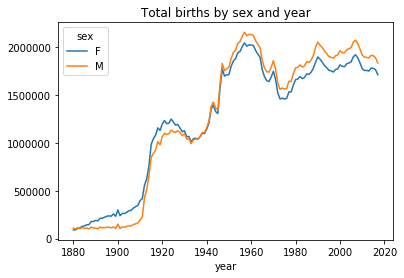

In [14]:
total_births.plot(title='Total births by sex and year')

In [15]:
def add_prop(group):
    group['prop'] = group['births'] / group['births'].sum()
    return group

In [16]:
names = names.groupby(['year', 'sex']).apply(add_prop)

In [17]:
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [18]:
names.groupby(['year', 'sex'])['prop'].sum().head(8)

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
      M      1.0
1883  F      1.0
      M      1.0
Name: prop, dtype: float64

In [19]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

In [20]:
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [21]:
top1000.head()

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

In [22]:
top1000.reset_index(inplace=True, drop=True)

In [23]:
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [24]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
    top1000 = pd.concat(pieces, ignore_index=True)

### Analyzing Naming Trends

In [25]:
boys = top1000[top1000['sex'] == 'M']

In [26]:
girls = top1000[top1000['sex'] == 'F']

In [27]:
total_births = top1000.pivot_table('births', index='year', 
                                   columns='name', aggfunc=sum)

In [28]:
total_births.head(10)

name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,...,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri,Zyaire
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,...,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,...,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,...,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,...,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,...,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN,NaN
1885,NaN,NaN,NaN,NaN,NaN,88.0,NaN,6.0,NaN,NaN,...,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0,NaN,NaN
1886,NaN,NaN,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,...,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0,NaN,NaN
1887,NaN,NaN,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,...,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0,NaN,NaN
1888,NaN,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,...,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0,NaN,NaN


In [29]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 1880 to 2017
Columns: 7134 entries, Aaden to Zyaire
dtypes: float64(7134)
memory usage: 7.5 MB


In [30]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

In [31]:
subset.head()

name,John,Harry,Mary,Marilyn
year,,,,
1880,9701.0,2158.0,7092.0,NaN
1881,8795.0,2002.0,6948.0,NaN
1882,9597.0,2246.0,8178.0,NaN
1883,8934.0,2116.0,8044.0,NaN
1884,9428.0,2338.0,9253.0,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2f3bb0cc0>,
      dtype=object)

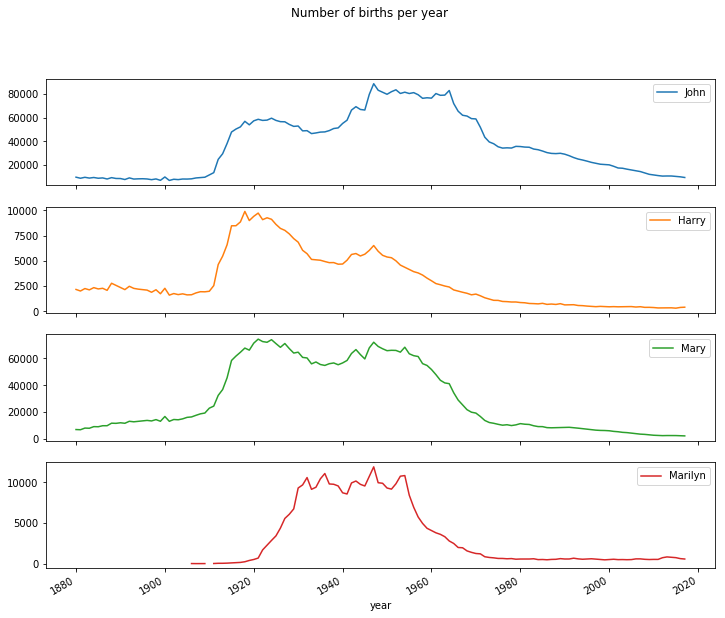

In [32]:
subset.plot(subplots=True, figsize=(12, 10), grid=False,
           title='Number of births per year')

### Measuring the increase in naming diversity

In [33]:
table = top1000.pivot_table('prop', index='year', 
                            columns='sex', aggfunc=sum)

In [34]:
table.head()

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539


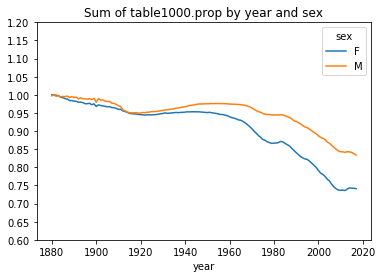

In [35]:
import numpy as np

table.plot(title='Sum of table1000.prop by year and sex',
          yticks=np.linspace(0.6,1.2,13), xticks=range(1880,2030,20))

In [36]:
df = boys[boys['year'] == 2010]

In [37]:
df.head()

,name,sex,births,year,prop
260877,Jacob,M,22117,2010,0.011544
260878,Ethan,M,18000,2010,0.009395
260879,Michael,M,17342,2010,0.009051
260880,Jayden,M,17171,2010,0.008962
260881,William,M,17048,2010,0.008898


> [pandas.DataFrame.cumsum](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumsum.html)

In [42]:
prop_cumsum = df.sort_values(by='prop', ascending=False)['prop'].cumsum()

In [44]:
prop_cumsum[:10]

260877    0.011544
260878    0.020939
260879    0.029990
260880    0.038952
260881    0.047850
260882    0.056594
260883    0.065178
260884    0.073443
260885    0.081552
260886    0.089635
Name: prop, dtype: float64

> [numpy.searchsorted](https://docs.scipy.org/doc/numpy/reference/generated/numpy.searchsorted.html)

In [49]:
prop_cumsum.values.searchsorted(0.5)

116

In [50]:
df = boys[boys['year'] == 1900] 

In [51]:
in1900 = df.sort_values(by='prop', ascending=False)['prop'].cumsum()

In [52]:
in1900.values.searchsorted(0.5) + 1

25

In [53]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group['prop'].cumsum().values.searchsorted(q) + 1

In [54]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)

In [56]:
diversity = diversity.unstack('sex')

In [57]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


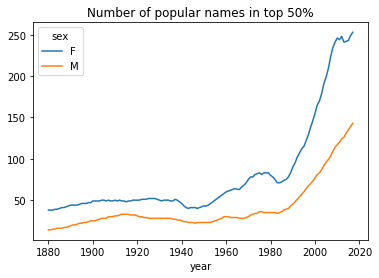

In [58]:
diversity.plot(title='Number of popular names in top 50%')

### The “last letter” revolution

In [59]:
# extract last letter from name column

In [77]:
get_last_letter = lambda x: x[-1]
last_letters = names['name'].map(get_last_letter)
last_letters.name = 'last_letter'

In [78]:
last_letters.head()

0    y
1    a
2    a
3    h
4    e
Name: last_letter, dtype: object

In [79]:
table = names.pivot_table('births', index=last_letters,
                         columns=['sex', 'year'], aggfunc=sum)

In [80]:
table.head()

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38329.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33380.0  34080.0  40399.0  41913.0  48089.0  49616.0  53883.0   

sex                                       ...            M            \
year            1887     1888     1889    ...         2008      2009   
last_letter                               ...                          
a            48942.0  59440.0  58631.0    ...      33020.0   31617.0   
b                NaN      NaN      NaN    ...      40080.0   39082.0   
c                NaN      NaN      NaN    ...      25389.0   24150.0   
d             1027.0   1298.0   1374.0    ...      48062.0   46345.0   
e            54352.0  66748.0  66662.0    ...     141334.0  135981.0   

sex                                                                      \
year             2010      2011      2012      2013      2014      2015   
last_letter                                                               
a             28859.0   27439.0   27201.0   27419.0   28247.0   28952.0   
b             39264.0   36667.0   34706.0   33226.0   31353.0   29557.0   
c             23341.0   23125.0   24268.0   24047.0   23805.0   23106.0   
d             44817.0   43231.0   42457.0   42658.0   43990.0   43717.0   
e            130228.0  128748.0  128430.0  132126.0  131978.0  128384.0   

sex                              
year             2016      2017  
last_letter                      
a             29647.0   29998.0  
b             26926.0   24368.0  
c             22006.0   20430.0  
d             42917.0   41862.0  
e            125781.0  121216.0  

[5 rows x 276 columns]

In [81]:
subtable = table.reindex(columns=[1910,1960,2010], level='year')

In [82]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108397.0  691250.0  676646.0    977.0    5212.0   28859.0
b                 NaN     694.0     455.0    411.0    3914.0   39264.0
c                 5.0      49.0     955.0    482.0   15460.0   23341.0
d              6751.0    3730.0    2640.0  22113.0  262136.0   44817.0
e            133600.0  435043.0  316665.0  28665.0  178785.0  130228.0

In [83]:
subtable.sum()

sex  year
F    1910     396502.0
     1960    2022018.0
     2010    1774758.0
M    1910     194213.0
     1960    2132359.0
     2010    1915942.0
dtype: float64

In [84]:
letter_prop = subtable / subtable.sum()

In [85]:
letter_prop.head()

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273383  0.341861  0.381261  0.005031  0.002444  0.015063
b                 NaN  0.000343  0.000256  0.002116  0.001836  0.020493
c            0.000013  0.000024  0.000538  0.002482  0.007250  0.012183
d            0.017026  0.001845  0.001488  0.113860  0.122932  0.023392
e            0.336947  0.215153  0.178427  0.147596  0.083844  0.067971

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline 

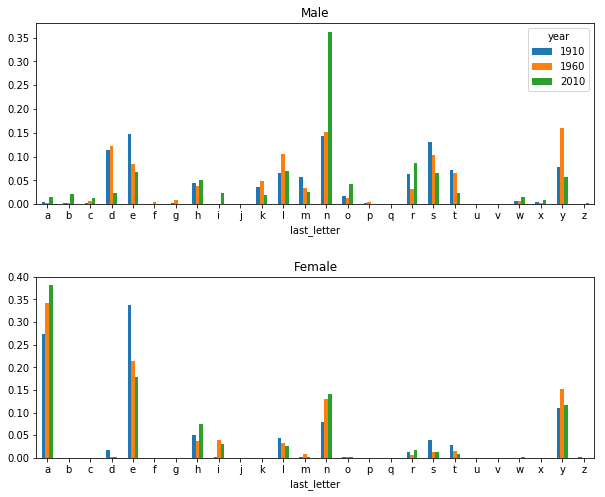

In [93]:
fig, axes = plt.subplots(2,1, figsize=(10,8))

plt.subplots_adjust(left=None, bottom=None, right=None, 
                    top=None, wspace=None, hspace=0.4)

letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')

letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], 
                      title='Female', legend=False)

In [94]:
letter_prop = table / table.sum()

In [95]:
letter_prop.head()

sex                 F                                                    \
year             1880      1881      1882      1883      1884      1885   
last_letter                                                               
a            0.345587  0.343447  0.338776  0.341251  0.338552  0.341272   
b                 NaN       NaN       NaN       NaN       NaN       NaN   
c                 NaN       NaN  0.000046  0.000045       NaN       NaN   
d            0.006693  0.006601  0.006806  0.007212  0.007100  0.006479   
e            0.366841  0.370624  0.374595  0.373160  0.372725  0.372898   

sex                                                    ...            M  \
year             1886      1887      1888      1889    ...         2008   
last_letter                                            ...                
a            0.339715  0.335263  0.332770  0.328712    ...     0.016204   
b                 NaN       NaN       NaN       NaN    ...     0.019669   
c                 NaN       NaN       NaN       NaN    ...     0.012459   
d            0.006967  0.007035  0.007267  0.007703    ...     0.023586   
e            0.372808  0.372322  0.373683  0.373737    ...     0.069358   

sex                                                                      \
year             2009      2010      2011      2012      2013      2014   
last_letter                                                               
a            0.015960  0.015063  0.014473  0.014368  0.014531  0.014749   
b            0.019728  0.020493  0.019340  0.018333  0.017608  0.016370   
c            0.012191  0.012183  0.012197  0.012819  0.012744  0.012429   
d            0.023394  0.023392  0.022802  0.022427  0.022606  0.022968   
e            0.068641  0.067971  0.067908  0.067840  0.070019  0.068909   

sex                                        
year             2015      2016      2017  
last_letter                                
a            0.015160  0.015694  0.016352  
b            0.015476  0.014254  0.013283  
c            0.012099  0.011649  0.011137  
d            0.022891  0.022719  0.022819  
e            0.067224  0.066584  0.066076  

[5 rows x 276 columns]

In [97]:
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T

In [99]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153216,0.075762
1881,0.083242,0.153212,0.077455
1882,0.085332,0.149561,0.077538
1883,0.084051,0.151653,0.079148
1884,0.086122,0.149927,0.080408


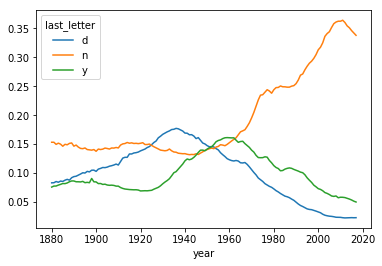

In [100]:
dny_ts.plot()

### Boy names that became girl names (and vice versa)

In [101]:
all_names = pd.Series(top1000['name'].unique())

In [102]:
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]

In [103]:
lesley_like

632     Leslie
2294    Lesley
4264    Leslee
4732     Lesli
6107     Lesly
dtype: object

In [105]:
filtered = top1000[top1000['name'].isin(lesley_like)]

In [107]:
filtered.head()

,name,sex,births,year,prop
632,Leslie,F,8,1880,0.000088
1108,Leslie,M,79,1880,0.000715
2461,Leslie,F,11,1881,0.000120
3014,Leslie,M,92,1881,0.000913
4512,Leslie,F,9,1882,0.000083


In [106]:
filtered.groupby('name')['births'].sum()

name
Leslee       993
Lesley     35032
Lesli        929
Leslie    377561
Lesly      11432
Name: births, dtype: int64

In [119]:
table = filtered.pivot_table('births', index='year',
                            columns='sex', aggfunc='sum')

In [120]:
table.head()

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0


> **pandas.DataFrame.div**: Floating division of dataframe and other, element-wise (binary operator truediv)

In [121]:
table = table.div(table.sum(1), axis=0)

In [122]:
table.head()

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857


In [123]:
table.tail()

sex,F,M
year,,
2013,1.0,NaN
2014,1.0,NaN
2015,1.0,NaN
2016,1.0,NaN
2017,1.0,NaN


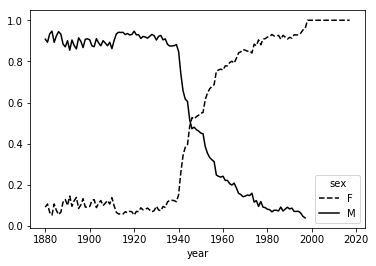

In [124]:
table.plot(style={'M': 'k-', 'F': 'k--'})